# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [13]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [14]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [15]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [16]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133
print(loss)
# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

1.3037878913298202
Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [17]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)
# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447687e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738422e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.01714364353292382


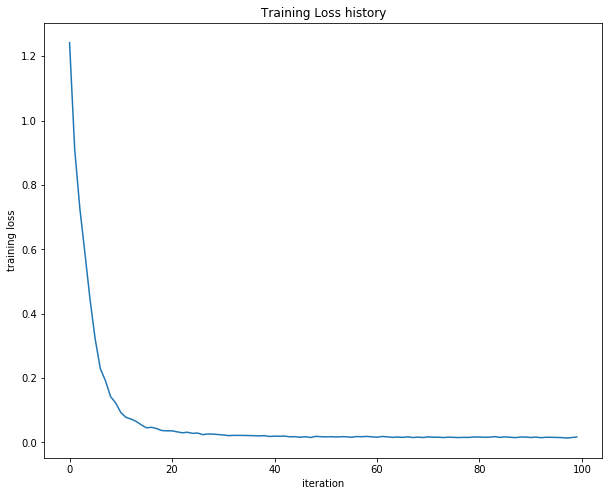

In [18]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [19]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302358
iteration 200 / 1000: loss 2.297404
iteration 300 / 1000: loss 2.258897
iteration 400 / 1000: loss 2.202975
iteration 500 / 1000: loss 2.116816
iteration 600 / 1000: loss 2.049789
iteration 700 / 1000: loss 1.985711
iteration 800 / 1000: loss 2.003726
iteration 900 / 1000: loss 1.948076
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

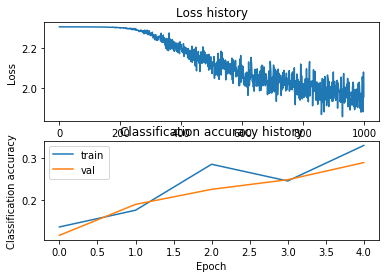

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

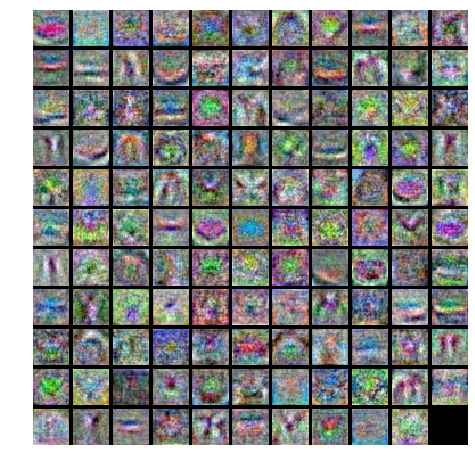

In [54]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()


show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

iteration 0 / 2000: loss 2.302704
iteration 100 / 2000: loss 2.017209
iteration 200 / 2000: loss 1.822516
iteration 300 / 2000: loss 1.782570
iteration 400 / 2000: loss 1.729793
iteration 500 / 2000: loss 1.649614
iteration 600 / 2000: loss 1.530565
iteration 700 / 2000: loss 1.395486
iteration 800 / 2000: loss 1.443195
iteration 900 / 2000: loss 1.552195
iteration 1000 / 2000: loss 1.603985
iteration 1100 / 2000: loss 1.542441
iteration 1200 / 2000: loss 1.482640
iteration 1300 / 2000: loss 1.552896
iteration 1400 / 2000: loss 1.523864
iteration 1500 / 2000: loss 1.387910
iteration 1600 / 2000: loss 1.484338
iteration 1700 / 2000: loss 1.452876
iteration 1800 / 2000: loss 1.478763
iteration 1900 / 2000: loss 1.377564
0.001 0.2 40 2000 200


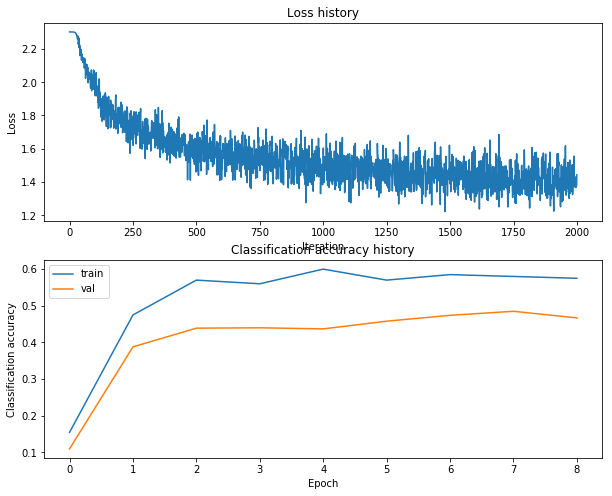

iteration 0 / 2000: loss 2.302688
iteration 100 / 2000: loss 1.979694
iteration 200 / 2000: loss 1.769184
iteration 300 / 2000: loss 1.738839
iteration 400 / 2000: loss 1.585593
iteration 500 / 2000: loss 1.527435
iteration 600 / 2000: loss 1.533606
iteration 700 / 2000: loss 1.550390
iteration 800 / 2000: loss 1.468662
iteration 900 / 2000: loss 1.466390
iteration 1000 / 2000: loss 1.477363
iteration 1100 / 2000: loss 1.571454
iteration 1200 / 2000: loss 1.368621
iteration 1300 / 2000: loss 1.368942
iteration 1400 / 2000: loss 1.399108
iteration 1500 / 2000: loss 1.536996
iteration 1600 / 2000: loss 1.393898
iteration 1700 / 2000: loss 1.411760
iteration 1800 / 2000: loss 1.449295
iteration 1900 / 2000: loss 1.413317
0.001 0.2 40 2000 300


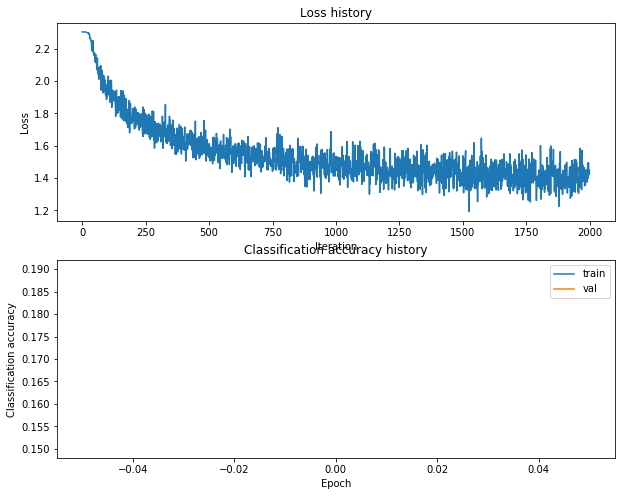

iteration 0 / 3000: loss 2.302719
iteration 100 / 3000: loss 1.970911
iteration 200 / 3000: loss 1.801632
iteration 300 / 3000: loss 1.759585
iteration 400 / 3000: loss 1.564695
iteration 500 / 3000: loss 1.561837
iteration 600 / 3000: loss 1.551406
iteration 700 / 3000: loss 1.547919
iteration 800 / 3000: loss 1.491846
iteration 900 / 3000: loss 1.386101
iteration 1000 / 3000: loss 1.468013
iteration 1100 / 3000: loss 1.562173
iteration 1200 / 3000: loss 1.458326
iteration 1300 / 3000: loss 1.417580
iteration 1400 / 3000: loss 1.506528
iteration 1500 / 3000: loss 1.481788
iteration 1600 / 3000: loss 1.370056
iteration 1700 / 3000: loss 1.441711
iteration 1800 / 3000: loss 1.383835
iteration 1900 / 3000: loss 1.395864
iteration 2000 / 3000: loss 1.317445
iteration 2100 / 3000: loss 1.431391
iteration 2200 / 3000: loss 1.383668
iteration 2300 / 3000: loss 1.413580
iteration 2400 / 3000: loss 1.460886
iteration 2500 / 3000: loss 1.334051
iteration 2600 / 3000: loss 1.398745
iteration 270

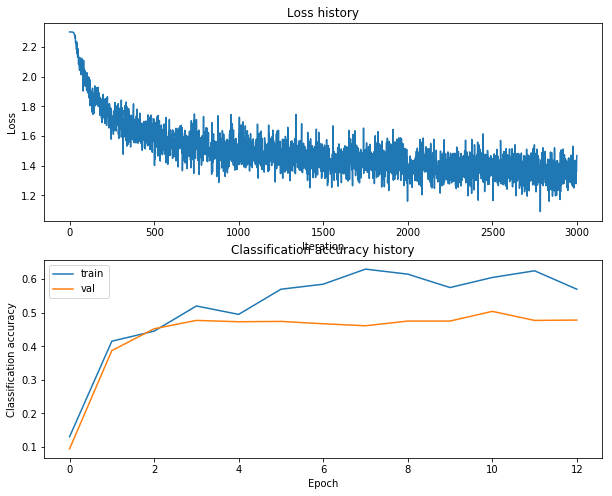

iteration 0 / 3000: loss 2.302712
iteration 100 / 3000: loss 1.971548
iteration 200 / 3000: loss 1.824711
iteration 300 / 3000: loss 1.691403
iteration 400 / 3000: loss 1.658100
iteration 500 / 3000: loss 1.607840
iteration 600 / 3000: loss 1.519850
iteration 700 / 3000: loss 1.595283
iteration 800 / 3000: loss 1.498361
iteration 900 / 3000: loss 1.566098
iteration 1000 / 3000: loss 1.459270
iteration 1100 / 3000: loss 1.515912
iteration 1200 / 3000: loss 1.416119
iteration 1300 / 3000: loss 1.458666
iteration 1400 / 3000: loss 1.432889
iteration 1500 / 3000: loss 1.424168
iteration 1600 / 3000: loss 1.428392
iteration 1700 / 3000: loss 1.378954
iteration 1800 / 3000: loss 1.392033
iteration 1900 / 3000: loss 1.601755
iteration 2000 / 3000: loss 1.462871
iteration 2100 / 3000: loss 1.433184
iteration 2200 / 3000: loss 1.467600
iteration 2300 / 3000: loss 1.403924
iteration 2400 / 3000: loss 1.338579
iteration 2500 / 3000: loss 1.384294
iteration 2600 / 3000: loss 1.367178
iteration 270

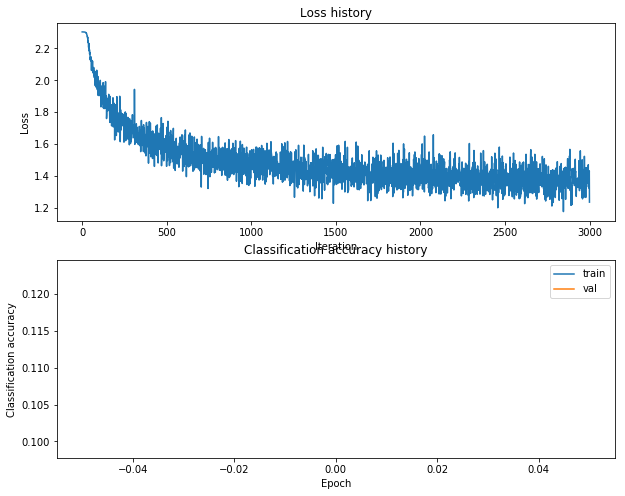

iteration 0 / 2000: loss 2.302768
iteration 100 / 2000: loss 1.888610
iteration 200 / 2000: loss 1.724041
iteration 300 / 2000: loss 1.624366
iteration 400 / 2000: loss 1.654670
iteration 500 / 2000: loss 1.588222
iteration 600 / 2000: loss 1.517792
iteration 700 / 2000: loss 1.540994
iteration 800 / 2000: loss 1.507983
iteration 900 / 2000: loss 1.575742
iteration 1000 / 2000: loss 1.610677
iteration 1100 / 2000: loss 1.304978
iteration 1200 / 2000: loss 1.461010
iteration 1300 / 2000: loss 1.488205
iteration 1400 / 2000: loss 1.385491
iteration 1500 / 2000: loss 1.464521
iteration 1600 / 2000: loss 1.510431
iteration 1700 / 2000: loss 1.290335
iteration 1800 / 2000: loss 1.398921
iteration 1900 / 2000: loss 1.447021
0.001 0.2 60 2000 200


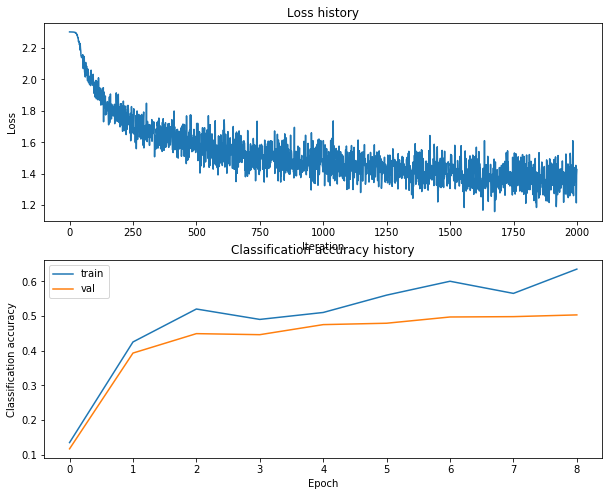

iteration 0 / 2000: loss 2.302755
iteration 100 / 2000: loss 1.958072
iteration 200 / 2000: loss 1.749645
iteration 300 / 2000: loss 1.629629
iteration 400 / 2000: loss 1.599419
iteration 500 / 2000: loss 1.487654
iteration 600 / 2000: loss 1.558237
iteration 700 / 2000: loss 1.377186
iteration 800 / 2000: loss 1.401616
iteration 900 / 2000: loss 1.507244
iteration 1000 / 2000: loss 1.372731
iteration 1100 / 2000: loss 1.508919
iteration 1200 / 2000: loss 1.427509
iteration 1300 / 2000: loss 1.369571
iteration 1400 / 2000: loss 1.306878
iteration 1500 / 2000: loss 1.374190
iteration 1600 / 2000: loss 1.385304
iteration 1700 / 2000: loss 1.435042
iteration 1800 / 2000: loss 1.351091
iteration 1900 / 2000: loss 1.334714
0.001 0.2 60 2000 300


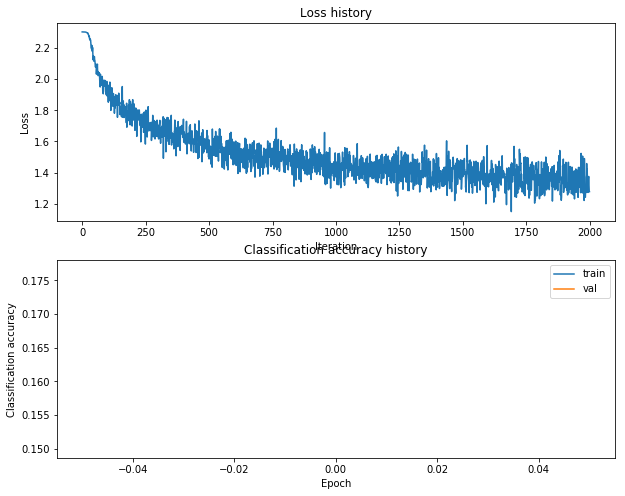

iteration 0 / 3000: loss 2.302778
iteration 100 / 3000: loss 1.942196
iteration 200 / 3000: loss 1.755796
iteration 300 / 3000: loss 1.742909
iteration 400 / 3000: loss 1.638122
iteration 500 / 3000: loss 1.526651
iteration 600 / 3000: loss 1.566954
iteration 700 / 3000: loss 1.625128
iteration 800 / 3000: loss 1.436756
iteration 900 / 3000: loss 1.458694
iteration 1000 / 3000: loss 1.508258
iteration 1100 / 3000: loss 1.478520
iteration 1200 / 3000: loss 1.379380
iteration 1300 / 3000: loss 1.460642
iteration 1400 / 3000: loss 1.388700
iteration 1500 / 3000: loss 1.462779
iteration 1600 / 3000: loss 1.406728
iteration 1700 / 3000: loss 1.347571
iteration 1800 / 3000: loss 1.446165
iteration 1900 / 3000: loss 1.310317
iteration 2000 / 3000: loss 1.371721
iteration 2100 / 3000: loss 1.236317
iteration 2200 / 3000: loss 1.427762
iteration 2300 / 3000: loss 1.374029
iteration 2400 / 3000: loss 1.385946
iteration 2500 / 3000: loss 1.270870
iteration 2600 / 3000: loss 1.302725
iteration 270

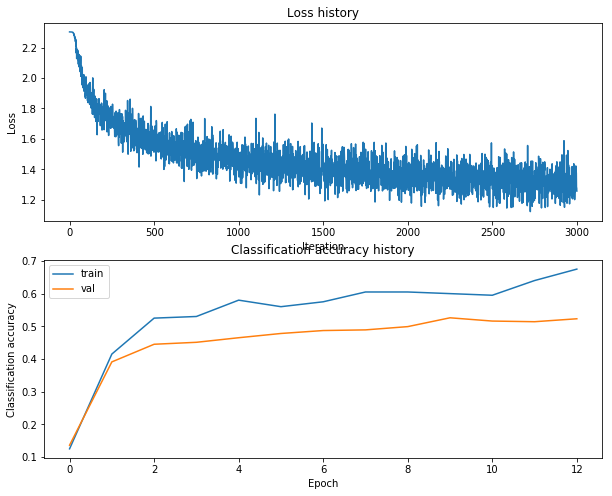

iteration 0 / 3000: loss 2.302763
iteration 100 / 3000: loss 1.930323
iteration 200 / 3000: loss 1.787462
iteration 300 / 3000: loss 1.638537
iteration 400 / 3000: loss 1.623772
iteration 500 / 3000: loss 1.399604
iteration 600 / 3000: loss 1.566683
iteration 700 / 3000: loss 1.476733
iteration 800 / 3000: loss 1.449959
iteration 900 / 3000: loss 1.460464
iteration 1000 / 3000: loss 1.457849
iteration 1100 / 3000: loss 1.342996
iteration 1200 / 3000: loss 1.398250
iteration 1300 / 3000: loss 1.349651
iteration 1400 / 3000: loss 1.387392
iteration 1500 / 3000: loss 1.505495
iteration 1600 / 3000: loss 1.438597
iteration 1700 / 3000: loss 1.361376
iteration 1800 / 3000: loss 1.396426
iteration 1900 / 3000: loss 1.267456
iteration 2000 / 3000: loss 1.321368
iteration 2100 / 3000: loss 1.391263
iteration 2200 / 3000: loss 1.250739
iteration 2300 / 3000: loss 1.290827
iteration 2400 / 3000: loss 1.257294
iteration 2500 / 3000: loss 1.276845
iteration 2600 / 3000: loss 1.317907
iteration 270

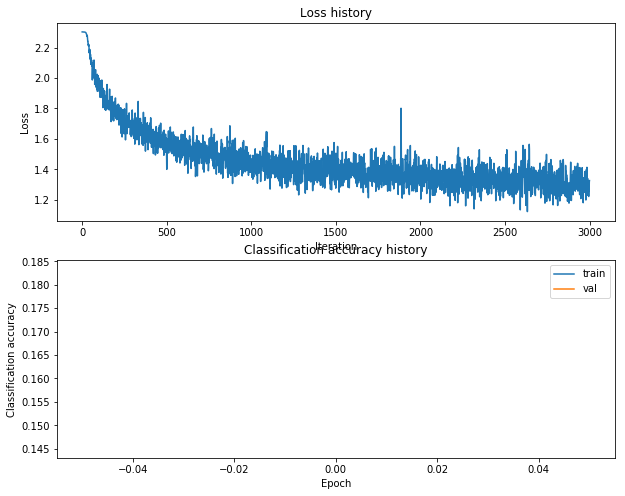

iteration 0 / 2000: loss 2.302952
iteration 100 / 2000: loss 1.817879
iteration 200 / 2000: loss 1.754489
iteration 300 / 2000: loss 1.679838
iteration 400 / 2000: loss 1.671394
iteration 500 / 2000: loss 1.536167
iteration 600 / 2000: loss 1.696348
iteration 700 / 2000: loss 1.529884
iteration 800 / 2000: loss 1.487243
iteration 900 / 2000: loss 1.369853
iteration 1000 / 2000: loss 1.421228
iteration 1100 / 2000: loss 1.424923
iteration 1200 / 2000: loss 1.347893
iteration 1300 / 2000: loss 1.354331
iteration 1400 / 2000: loss 1.301125
iteration 1500 / 2000: loss 1.396384
iteration 1600 / 2000: loss 1.330339
iteration 1700 / 2000: loss 1.195252
iteration 1800 / 2000: loss 1.384891
iteration 1900 / 2000: loss 1.365549
0.001 0.2 120 2000 200


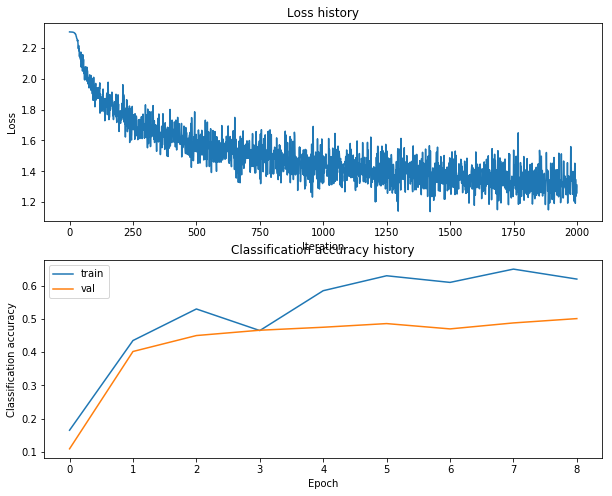

iteration 0 / 2000: loss 2.302936
iteration 100 / 2000: loss 1.889608
iteration 200 / 2000: loss 1.723408
iteration 300 / 2000: loss 1.620058
iteration 400 / 2000: loss 1.604727
iteration 500 / 2000: loss 1.576324
iteration 600 / 2000: loss 1.490195
iteration 700 / 2000: loss 1.346544
iteration 800 / 2000: loss 1.505309
iteration 900 / 2000: loss 1.419293
iteration 1000 / 2000: loss 1.421338
iteration 1100 / 2000: loss 1.376137
iteration 1200 / 2000: loss 1.314570
iteration 1300 / 2000: loss 1.335696
iteration 1400 / 2000: loss 1.298885
iteration 1500 / 2000: loss 1.343513
iteration 1600 / 2000: loss 1.334951
iteration 1700 / 2000: loss 1.412777
iteration 1800 / 2000: loss 1.263776
iteration 1900 / 2000: loss 1.308485
0.001 0.2 120 2000 300


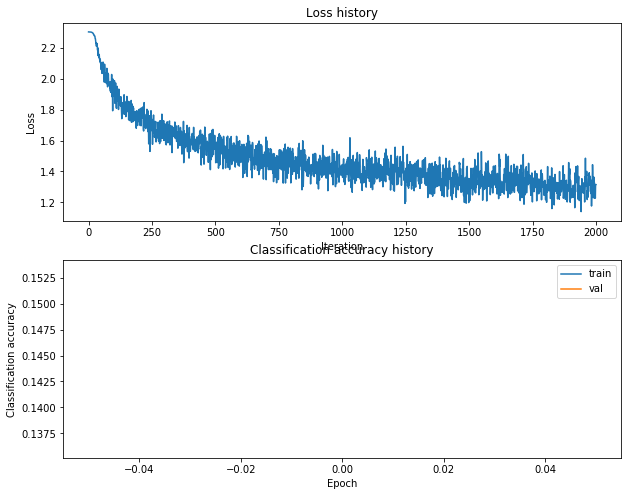

iteration 0 / 3000: loss 2.302956
iteration 100 / 3000: loss 1.862921
iteration 200 / 3000: loss 1.743776
iteration 300 / 3000: loss 1.702744
iteration 400 / 3000: loss 1.707251
iteration 500 / 3000: loss 1.652963
iteration 600 / 3000: loss 1.447968
iteration 700 / 3000: loss 1.569776
iteration 800 / 3000: loss 1.316204
iteration 900 / 3000: loss 1.456803
iteration 1000 / 3000: loss 1.439901
iteration 1100 / 3000: loss 1.354832
iteration 1200 / 3000: loss 1.503828
iteration 1300 / 3000: loss 1.545510
iteration 1400 / 3000: loss 1.447947
iteration 1500 / 3000: loss 1.403343
iteration 1600 / 3000: loss 1.317490
iteration 1700 / 3000: loss 1.295077
iteration 1800 / 3000: loss 1.199576
iteration 1900 / 3000: loss 1.330712
iteration 2000 / 3000: loss 1.230279
iteration 2100 / 3000: loss 1.312230
iteration 2200 / 3000: loss 1.266016
iteration 2300 / 3000: loss 1.335978
iteration 2400 / 3000: loss 1.201464
iteration 2500 / 3000: loss 1.225291
iteration 2600 / 3000: loss 1.177590
iteration 270

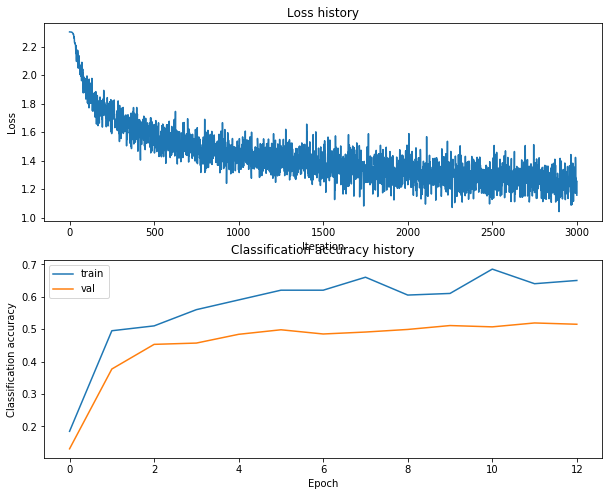

iteration 0 / 3000: loss 2.302949
iteration 100 / 3000: loss 1.921557
iteration 200 / 3000: loss 1.759639
iteration 300 / 3000: loss 1.677330
iteration 400 / 3000: loss 1.582462
iteration 500 / 3000: loss 1.530187
iteration 600 / 3000: loss 1.495945
iteration 700 / 3000: loss 1.529684
iteration 800 / 3000: loss 1.461979
iteration 900 / 3000: loss 1.446493
iteration 1000 / 3000: loss 1.542359
iteration 1100 / 3000: loss 1.315178
iteration 1200 / 3000: loss 1.335729
iteration 1300 / 3000: loss 1.341166
iteration 1400 / 3000: loss 1.327537
iteration 1500 / 3000: loss 1.396456
iteration 1600 / 3000: loss 1.475228
iteration 1700 / 3000: loss 1.272497
iteration 1800 / 3000: loss 1.343395
iteration 1900 / 3000: loss 1.396000
iteration 2000 / 3000: loss 1.348766
iteration 2100 / 3000: loss 1.475351
iteration 2200 / 3000: loss 1.421519
iteration 2300 / 3000: loss 1.305153
iteration 2400 / 3000: loss 1.234977
iteration 2500 / 3000: loss 1.257732
iteration 2600 / 3000: loss 1.461434
iteration 270

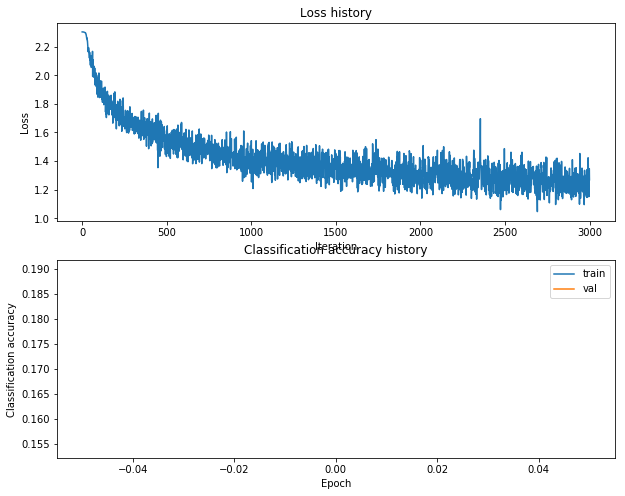

iteration 0 / 2000: loss 2.302822
iteration 100 / 2000: loss 1.980798
iteration 200 / 2000: loss 1.821262
iteration 300 / 2000: loss 1.706411
iteration 400 / 2000: loss 1.610819
iteration 500 / 2000: loss 1.695377
iteration 600 / 2000: loss 1.564871
iteration 700 / 2000: loss 1.490018
iteration 800 / 2000: loss 1.678631
iteration 900 / 2000: loss 1.438745
iteration 1000 / 2000: loss 1.257214
iteration 1100 / 2000: loss 1.467733
iteration 1200 / 2000: loss 1.344038
iteration 1300 / 2000: loss 1.541074
iteration 1400 / 2000: loss 1.415040
iteration 1500 / 2000: loss 1.555749
iteration 1600 / 2000: loss 1.424301
iteration 1700 / 2000: loss 1.336985
iteration 1800 / 2000: loss 1.500324
iteration 1900 / 2000: loss 1.545530
0.001 0.4 40 2000 200


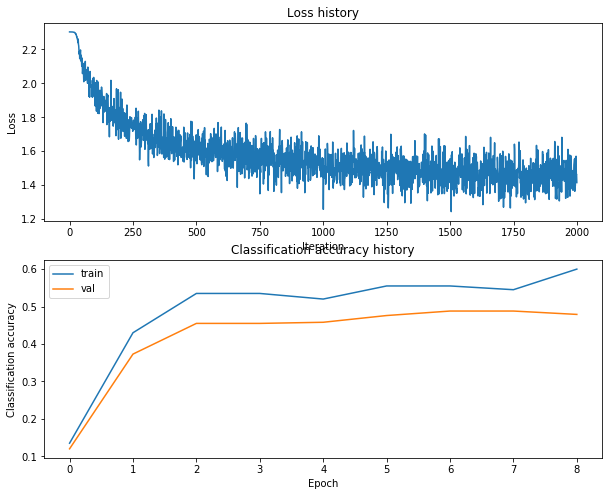

iteration 0 / 2000: loss 2.302848
iteration 100 / 2000: loss 1.933037
iteration 200 / 2000: loss 1.819812
iteration 300 / 2000: loss 1.703376
iteration 400 / 2000: loss 1.545776
iteration 500 / 2000: loss 1.553481
iteration 600 / 2000: loss 1.588386
iteration 700 / 2000: loss 1.474227
iteration 800 / 2000: loss 1.447211
iteration 900 / 2000: loss 1.429308
iteration 1000 / 2000: loss 1.484830
iteration 1100 / 2000: loss 1.445933
iteration 1200 / 2000: loss 1.448479
iteration 1300 / 2000: loss 1.452319
iteration 1400 / 2000: loss 1.458638
iteration 1500 / 2000: loss 1.517461
iteration 1600 / 2000: loss 1.417734
iteration 1700 / 2000: loss 1.499374
iteration 1800 / 2000: loss 1.436600
iteration 1900 / 2000: loss 1.366415
0.001 0.4 40 2000 300


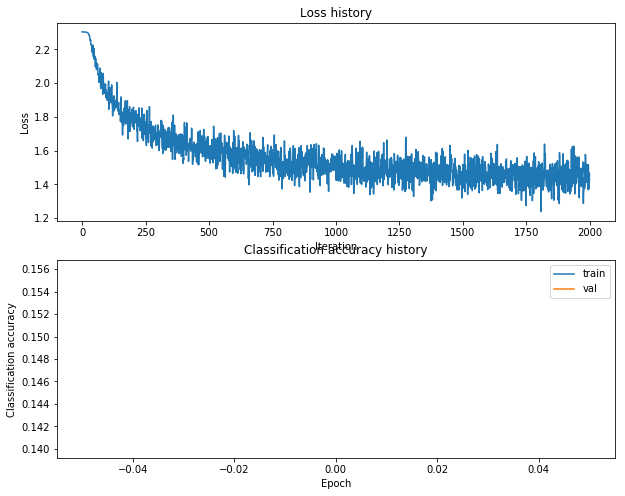

iteration 0 / 3000: loss 2.302856
iteration 100 / 3000: loss 1.877701
iteration 200 / 3000: loss 1.713389
iteration 300 / 3000: loss 1.658517
iteration 400 / 3000: loss 1.533401
iteration 500 / 3000: loss 1.697379
iteration 600 / 3000: loss 1.607713
iteration 700 / 3000: loss 1.605238
iteration 800 / 3000: loss 1.467587
iteration 900 / 3000: loss 1.609970
iteration 1000 / 3000: loss 1.495467
iteration 1100 / 3000: loss 1.518171
iteration 1200 / 3000: loss 1.435558
iteration 1300 / 3000: loss 1.516536
iteration 1400 / 3000: loss 1.411952
iteration 1500 / 3000: loss 1.584853
iteration 1600 / 3000: loss 1.475359
iteration 1700 / 3000: loss 1.314087
iteration 1800 / 3000: loss 1.445556
iteration 1900 / 3000: loss 1.410475
iteration 2000 / 3000: loss 1.397235
iteration 2100 / 3000: loss 1.395946
iteration 2200 / 3000: loss 1.375692
iteration 2300 / 3000: loss 1.271518
iteration 2400 / 3000: loss 1.468093
iteration 2500 / 3000: loss 1.493707
iteration 2600 / 3000: loss 1.408925
iteration 270

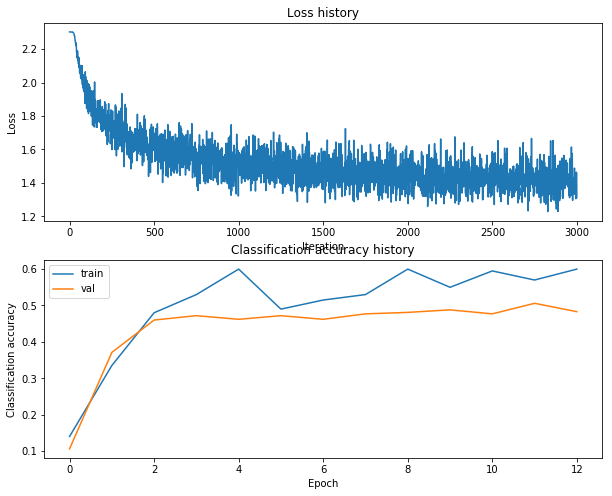

iteration 0 / 3000: loss 2.302833
iteration 100 / 3000: loss 1.971367
iteration 200 / 3000: loss 1.792919
iteration 300 / 3000: loss 1.705443
iteration 400 / 3000: loss 1.569529
iteration 500 / 3000: loss 1.589390
iteration 600 / 3000: loss 1.599592
iteration 700 / 3000: loss 1.520338
iteration 800 / 3000: loss 1.486984
iteration 900 / 3000: loss 1.618403
iteration 1000 / 3000: loss 1.505618
iteration 1100 / 3000: loss 1.517177
iteration 1200 / 3000: loss 1.402931
iteration 1300 / 3000: loss 1.464351
iteration 1400 / 3000: loss 1.569492
iteration 1500 / 3000: loss 1.465622
iteration 1600 / 3000: loss 1.502628
iteration 1700 / 3000: loss 1.561539
iteration 1800 / 3000: loss 1.371472
iteration 1900 / 3000: loss 1.551996
iteration 2000 / 3000: loss 1.376905
iteration 2100 / 3000: loss 1.534745
iteration 2200 / 3000: loss 1.275207
iteration 2300 / 3000: loss 1.468298
iteration 2400 / 3000: loss 1.508837
iteration 2500 / 3000: loss 1.406819
iteration 2600 / 3000: loss 1.398120
iteration 270

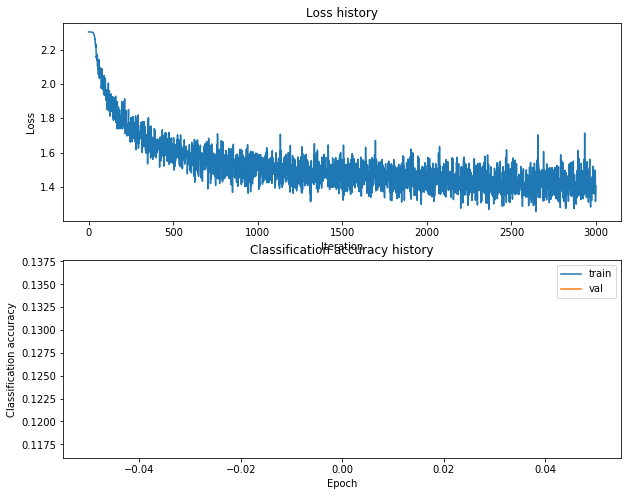

iteration 0 / 2000: loss 2.302968
iteration 100 / 2000: loss 1.907045
iteration 200 / 2000: loss 1.729857
iteration 300 / 2000: loss 1.656510
iteration 400 / 2000: loss 1.689958
iteration 500 / 2000: loss 1.665629
iteration 600 / 2000: loss 1.467454
iteration 700 / 2000: loss 1.592634
iteration 800 / 2000: loss 1.479221
iteration 900 / 2000: loss 1.471597
iteration 1000 / 2000: loss 1.472381
iteration 1100 / 2000: loss 1.450251
iteration 1200 / 2000: loss 1.508943
iteration 1300 / 2000: loss 1.489608
iteration 1400 / 2000: loss 1.524591
iteration 1500 / 2000: loss 1.447407
iteration 1600 / 2000: loss 1.587816
iteration 1700 / 2000: loss 1.504942
iteration 1800 / 2000: loss 1.480121
iteration 1900 / 2000: loss 1.491817
0.001 0.4 60 2000 200


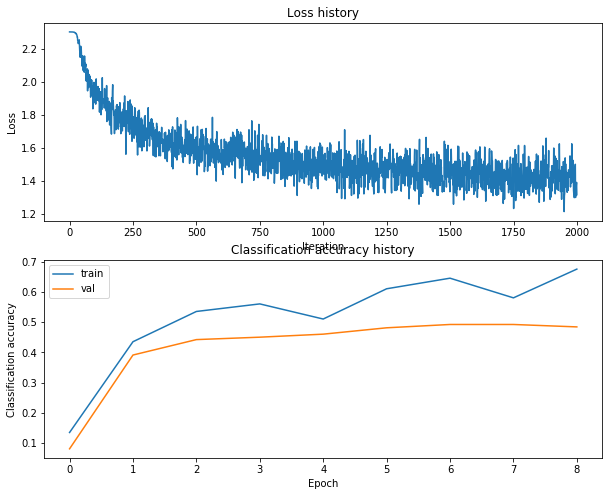

iteration 0 / 2000: loss 2.302965
iteration 100 / 2000: loss 1.966540
iteration 200 / 2000: loss 1.821373
iteration 300 / 2000: loss 1.661026
iteration 400 / 2000: loss 1.577268
iteration 500 / 2000: loss 1.607557
iteration 600 / 2000: loss 1.626400
iteration 700 / 2000: loss 1.510542
iteration 800 / 2000: loss 1.417012
iteration 900 / 2000: loss 1.370677
iteration 1000 / 2000: loss 1.501679
iteration 1100 / 2000: loss 1.417385
iteration 1200 / 2000: loss 1.470111
iteration 1300 / 2000: loss 1.359935
iteration 1400 / 2000: loss 1.472099
iteration 1500 / 2000: loss 1.471890
iteration 1600 / 2000: loss 1.430423
iteration 1700 / 2000: loss 1.315139
iteration 1800 / 2000: loss 1.414332
iteration 1900 / 2000: loss 1.377351
0.001 0.4 60 2000 300


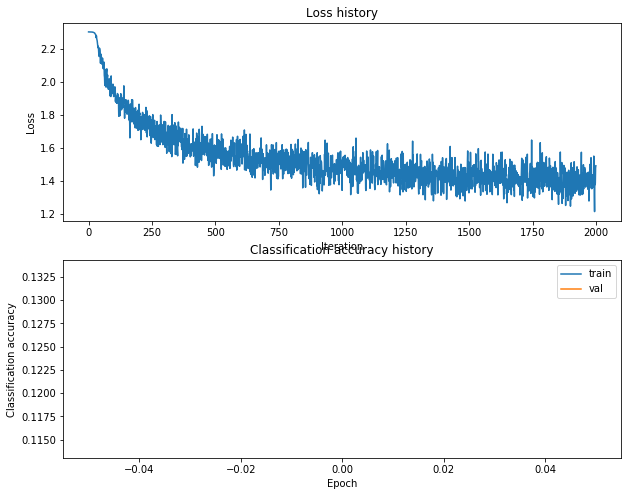

iteration 0 / 3000: loss 2.302968
iteration 100 / 3000: loss 1.922644
iteration 200 / 3000: loss 1.782813
iteration 300 / 3000: loss 1.795348
iteration 400 / 3000: loss 1.650038
iteration 500 / 3000: loss 1.538309
iteration 600 / 3000: loss 1.572757
iteration 700 / 3000: loss 1.521976
iteration 800 / 3000: loss 1.405205
iteration 900 / 3000: loss 1.605941
iteration 1000 / 3000: loss 1.577311
iteration 1100 / 3000: loss 1.486556
iteration 1200 / 3000: loss 1.312058
iteration 1300 / 3000: loss 1.442347
iteration 1400 / 3000: loss 1.465970
iteration 1500 / 3000: loss 1.434020
iteration 1600 / 3000: loss 1.463726
iteration 1700 / 3000: loss 1.172665
iteration 1800 / 3000: loss 1.309757
iteration 1900 / 3000: loss 1.445710
iteration 2000 / 3000: loss 1.295835
iteration 2100 / 3000: loss 1.348087
iteration 2200 / 3000: loss 1.417974
iteration 2300 / 3000: loss 1.399604
iteration 2400 / 3000: loss 1.322080
iteration 2500 / 3000: loss 1.263259
iteration 2600 / 3000: loss 1.348057
iteration 270

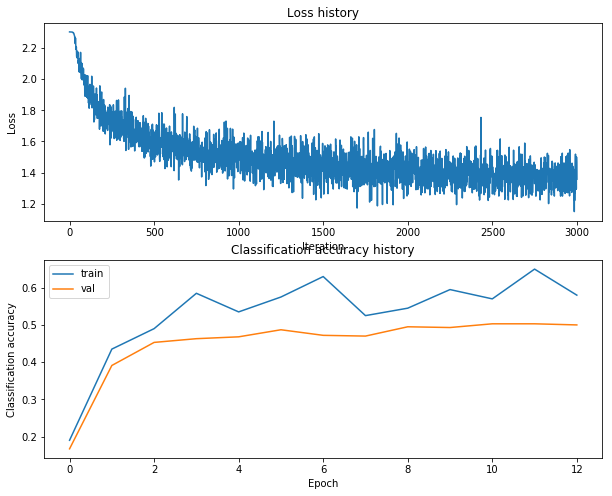

iteration 0 / 3000: loss 2.302968
iteration 100 / 3000: loss 1.910359
iteration 200 / 3000: loss 1.844591
iteration 300 / 3000: loss 1.764275
iteration 400 / 3000: loss 1.631532
iteration 500 / 3000: loss 1.506679
iteration 600 / 3000: loss 1.558786
iteration 700 / 3000: loss 1.604485
iteration 800 / 3000: loss 1.495909
iteration 900 / 3000: loss 1.638261
iteration 1000 / 3000: loss 1.508885
iteration 1100 / 3000: loss 1.527017
iteration 1200 / 3000: loss 1.368142
iteration 1300 / 3000: loss 1.393207
iteration 1400 / 3000: loss 1.354991
iteration 1500 / 3000: loss 1.367385
iteration 1600 / 3000: loss 1.430680
iteration 1700 / 3000: loss 1.435190
iteration 1800 / 3000: loss 1.456158
iteration 1900 / 3000: loss 1.398134
iteration 2000 / 3000: loss 1.367235
iteration 2100 / 3000: loss 1.443087
iteration 2200 / 3000: loss 1.357809
iteration 2300 / 3000: loss 1.712259
iteration 2400 / 3000: loss 1.375845
iteration 2500 / 3000: loss 1.485452
iteration 2600 / 3000: loss 1.301732
iteration 270

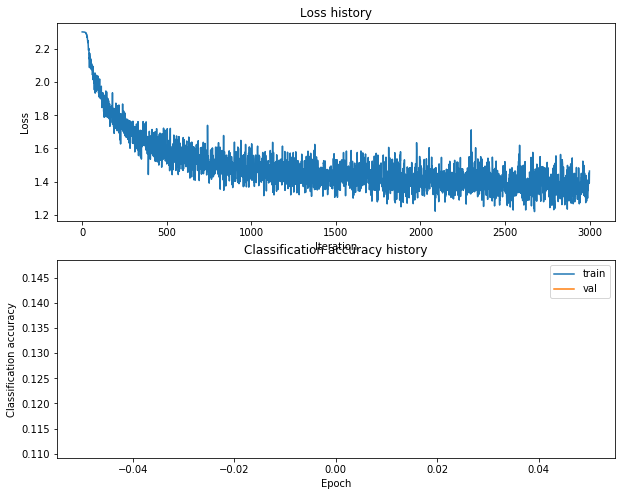

iteration 0 / 2000: loss 2.303323
iteration 100 / 2000: loss 1.940498
iteration 200 / 2000: loss 1.743834
iteration 300 / 2000: loss 1.680277
iteration 400 / 2000: loss 1.636696
iteration 500 / 2000: loss 1.658536
iteration 600 / 2000: loss 1.446341
iteration 700 / 2000: loss 1.551769
iteration 800 / 2000: loss 1.655409
iteration 900 / 2000: loss 1.583322
iteration 1000 / 2000: loss 1.522024
iteration 1100 / 2000: loss 1.565722
iteration 1200 / 2000: loss 1.410036
iteration 1300 / 2000: loss 1.507982
iteration 1400 / 2000: loss 1.385787
iteration 1500 / 2000: loss 1.459117
iteration 1600 / 2000: loss 1.409013
iteration 1700 / 2000: loss 1.421877
iteration 1800 / 2000: loss 1.513762
iteration 1900 / 2000: loss 1.472051
0.001 0.4 120 2000 200


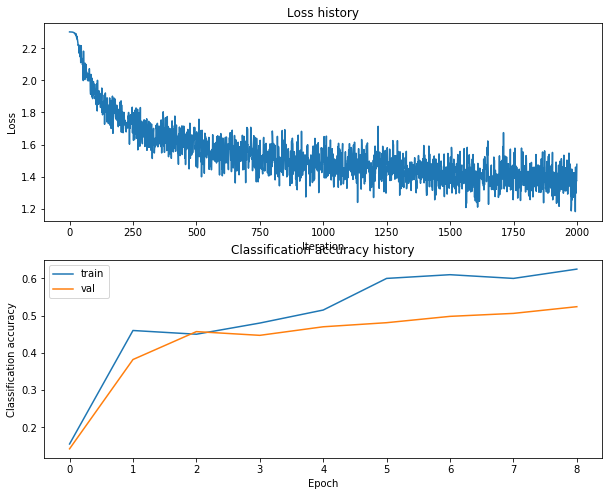

iteration 0 / 2000: loss 2.303314
iteration 100 / 2000: loss 1.960234
iteration 200 / 2000: loss 1.676152
iteration 300 / 2000: loss 1.676805
iteration 400 / 2000: loss 1.686939
iteration 500 / 2000: loss 1.538128
iteration 600 / 2000: loss 1.531166
iteration 700 / 2000: loss 1.530941
iteration 800 / 2000: loss 1.511677
iteration 900 / 2000: loss 1.510867
iteration 1000 / 2000: loss 1.430255
iteration 1100 / 2000: loss 1.338229
iteration 1200 / 2000: loss 1.511358
iteration 1300 / 2000: loss 1.354119
iteration 1400 / 2000: loss 1.387300
iteration 1500 / 2000: loss 1.439948
iteration 1600 / 2000: loss 1.458753
iteration 1700 / 2000: loss 1.402055
iteration 1800 / 2000: loss 1.439394
iteration 1900 / 2000: loss 1.390710
0.001 0.4 120 2000 300


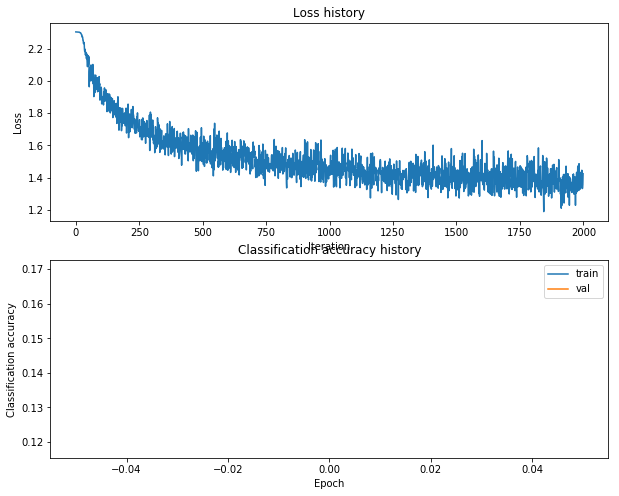

iteration 0 / 3000: loss 2.303290
iteration 100 / 3000: loss 1.892191
iteration 200 / 3000: loss 1.750032
iteration 300 / 3000: loss 1.711509
iteration 400 / 3000: loss 1.663318
iteration 500 / 3000: loss 1.550110
iteration 600 / 3000: loss 1.494379
iteration 700 / 3000: loss 1.513269
iteration 800 / 3000: loss 1.598137
iteration 900 / 3000: loss 1.330370
iteration 1000 / 3000: loss 1.460808
iteration 1100 / 3000: loss 1.375952
iteration 1200 / 3000: loss 1.535069
iteration 1300 / 3000: loss 1.467454
iteration 1400 / 3000: loss 1.494158
iteration 1500 / 3000: loss 1.312647
iteration 1600 / 3000: loss 1.226388
iteration 1700 / 3000: loss 1.454697
iteration 1800 / 3000: loss 1.348791
iteration 1900 / 3000: loss 1.391650
iteration 2000 / 3000: loss 1.318018
iteration 2100 / 3000: loss 1.471653
iteration 2200 / 3000: loss 1.563389
iteration 2300 / 3000: loss 1.450939
iteration 2400 / 3000: loss 1.408314
iteration 2500 / 3000: loss 1.152416
iteration 2600 / 3000: loss 1.390847
iteration 270

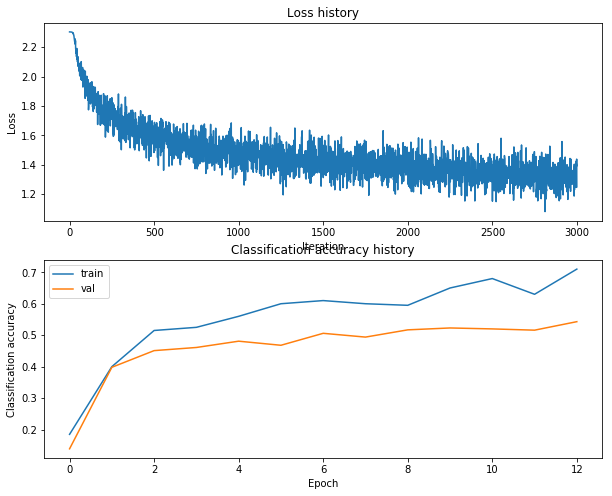

iteration 0 / 3000: loss 2.303322
iteration 100 / 3000: loss 1.887257
iteration 200 / 3000: loss 1.739947
iteration 300 / 3000: loss 1.680258
iteration 400 / 3000: loss 1.532601
iteration 500 / 3000: loss 1.512297
iteration 600 / 3000: loss 1.482458
iteration 700 / 3000: loss 1.521810
iteration 800 / 3000: loss 1.560450
iteration 900 / 3000: loss 1.500429
iteration 1000 / 3000: loss 1.446415
iteration 1100 / 3000: loss 1.452331
iteration 1200 / 3000: loss 1.491753
iteration 1300 / 3000: loss 1.405755
iteration 1400 / 3000: loss 1.386079
iteration 1500 / 3000: loss 1.323475
iteration 1600 / 3000: loss 1.430996
iteration 1700 / 3000: loss 1.350974
iteration 1800 / 3000: loss 1.384968
iteration 1900 / 3000: loss 1.382663
iteration 2000 / 3000: loss 1.418726
iteration 2100 / 3000: loss 1.471762
iteration 2200 / 3000: loss 1.446582
iteration 2300 / 3000: loss 1.306503
iteration 2400 / 3000: loss 1.295198
iteration 2500 / 3000: loss 1.408001
iteration 2600 / 3000: loss 1.372973
iteration 270

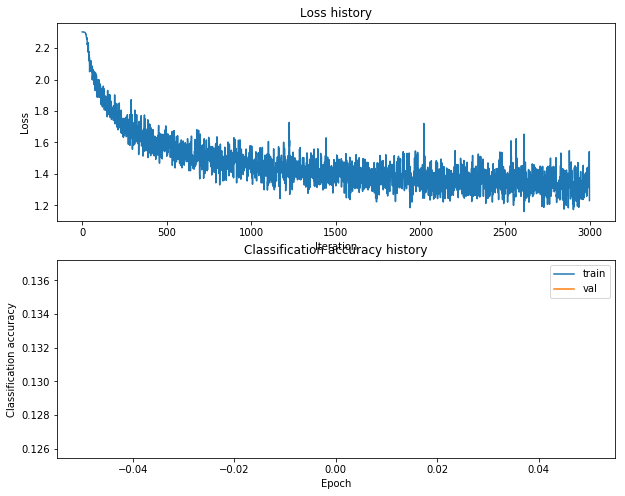

iteration 0 / 2000: loss 2.302949
iteration 100 / 2000: loss 2.005510
iteration 200 / 2000: loss 1.779779
iteration 300 / 2000: loss 1.721335
iteration 400 / 2000: loss 1.717644
iteration 500 / 2000: loss 1.660896
iteration 600 / 2000: loss 1.581661
iteration 700 / 2000: loss 1.590709
iteration 800 / 2000: loss 1.542630
iteration 900 / 2000: loss 1.401911
iteration 1000 / 2000: loss 1.614475
iteration 1100 / 2000: loss 1.558689
iteration 1200 / 2000: loss 1.537677
iteration 1300 / 2000: loss 1.643113
iteration 1400 / 2000: loss 1.514949
iteration 1500 / 2000: loss 1.570320
iteration 1600 / 2000: loss 1.459006
iteration 1700 / 2000: loss 1.440744
iteration 1800 / 2000: loss 1.492205
iteration 1900 / 2000: loss 1.514806
0.001 0.6 40 2000 200


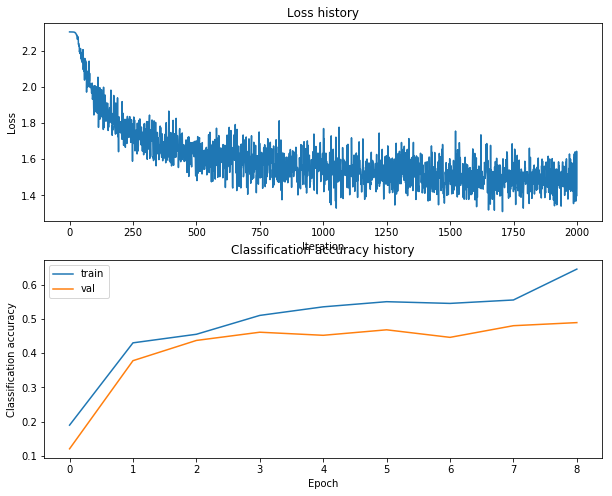

iteration 0 / 2000: loss 2.302943
iteration 100 / 2000: loss 1.987990
iteration 200 / 2000: loss 1.821233
iteration 300 / 2000: loss 1.739537
iteration 400 / 2000: loss 1.707305
iteration 500 / 2000: loss 1.574458
iteration 600 / 2000: loss 1.617868
iteration 700 / 2000: loss 1.610669
iteration 800 / 2000: loss 1.549484
iteration 900 / 2000: loss 1.507537
iteration 1000 / 2000: loss 1.479429
iteration 1100 / 2000: loss 1.478027
iteration 1200 / 2000: loss 1.601976
iteration 1300 / 2000: loss 1.452730
iteration 1400 / 2000: loss 1.501835
iteration 1500 / 2000: loss 1.502139
iteration 1600 / 2000: loss 1.541349
iteration 1700 / 2000: loss 1.514230
iteration 1800 / 2000: loss 1.465446
iteration 1900 / 2000: loss 1.448343
0.001 0.6 40 2000 300


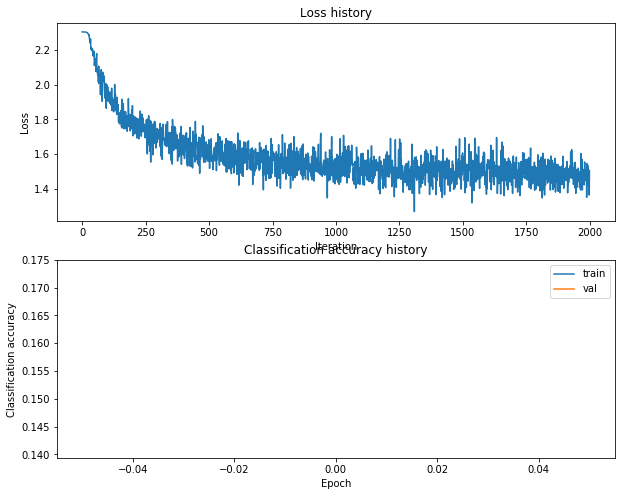

iteration 0 / 3000: loss 2.302971
iteration 100 / 3000: loss 1.962843
iteration 200 / 3000: loss 1.758083
iteration 300 / 3000: loss 1.691587
iteration 400 / 3000: loss 1.702865
iteration 500 / 3000: loss 1.678822
iteration 600 / 3000: loss 1.771941
iteration 700 / 3000: loss 1.601475
iteration 800 / 3000: loss 1.599761
iteration 900 / 3000: loss 1.675940
iteration 1000 / 3000: loss 1.480048
iteration 1100 / 3000: loss 1.717645
iteration 1200 / 3000: loss 1.480823
iteration 1300 / 3000: loss 1.482074
iteration 1400 / 3000: loss 1.481978
iteration 1500 / 3000: loss 1.460962
iteration 1600 / 3000: loss 1.504582
iteration 1700 / 3000: loss 1.481505
iteration 1800 / 3000: loss 1.466385
iteration 1900 / 3000: loss 1.505878
iteration 2000 / 3000: loss 1.417215
iteration 2100 / 3000: loss 1.490817
iteration 2200 / 3000: loss 1.498924
iteration 2300 / 3000: loss 1.381508
iteration 2400 / 3000: loss 1.429555
iteration 2500 / 3000: loss 1.572389
iteration 2600 / 3000: loss 1.493908
iteration 270

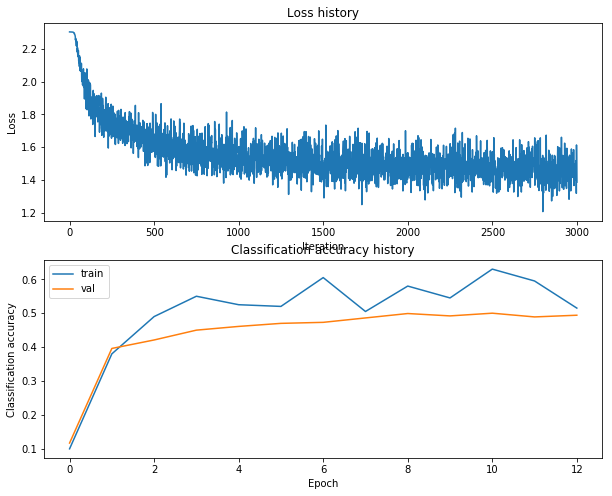

iteration 0 / 3000: loss 2.302946
iteration 100 / 3000: loss 1.946509
iteration 200 / 3000: loss 1.883702
iteration 300 / 3000: loss 1.690685
iteration 400 / 3000: loss 1.570109
iteration 500 / 3000: loss 1.577739
iteration 600 / 3000: loss 1.619430
iteration 700 / 3000: loss 1.472022
iteration 800 / 3000: loss 1.550201
iteration 900 / 3000: loss 1.505216
iteration 1000 / 3000: loss 1.482381
iteration 1100 / 3000: loss 1.519652
iteration 1200 / 3000: loss 1.525103
iteration 1300 / 3000: loss 1.363863
iteration 1400 / 3000: loss 1.493581
iteration 1500 / 3000: loss 1.546926
iteration 1600 / 3000: loss 1.495006
iteration 1700 / 3000: loss 1.475642
iteration 1800 / 3000: loss 1.500515
iteration 1900 / 3000: loss 1.490022
iteration 2000 / 3000: loss 1.537077
iteration 2100 / 3000: loss 1.403785
iteration 2200 / 3000: loss 1.565544
iteration 2300 / 3000: loss 1.544728
iteration 2400 / 3000: loss 1.437474
iteration 2500 / 3000: loss 1.504779
iteration 2600 / 3000: loss 1.535428
iteration 270

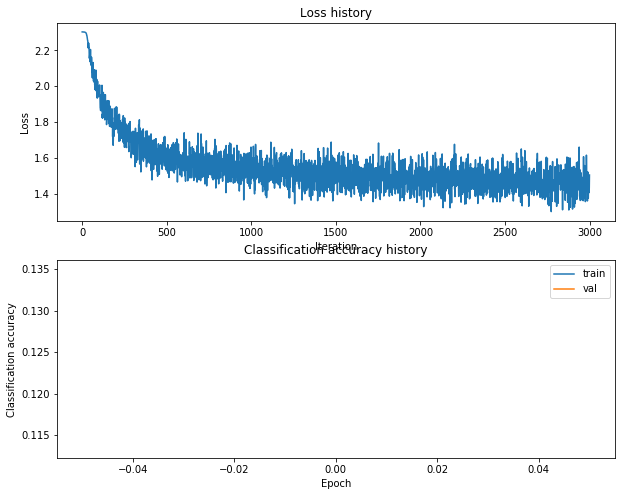

iteration 0 / 2000: loss 2.303158
iteration 100 / 2000: loss 1.966851
iteration 200 / 2000: loss 1.710160
iteration 300 / 2000: loss 1.585600
iteration 400 / 2000: loss 1.706511
iteration 500 / 2000: loss 1.640441
iteration 600 / 2000: loss 1.518824
iteration 700 / 2000: loss 1.501502
iteration 800 / 2000: loss 1.555028
iteration 900 / 2000: loss 1.459953
iteration 1000 / 2000: loss 1.482286
iteration 1100 / 2000: loss 1.545240
iteration 1200 / 2000: loss 1.566267
iteration 1300 / 2000: loss 1.376697
iteration 1400 / 2000: loss 1.444535
iteration 1500 / 2000: loss 1.442362
iteration 1600 / 2000: loss 1.357279
iteration 1700 / 2000: loss 1.425355
iteration 1800 / 2000: loss 1.325702
iteration 1900 / 2000: loss 1.390727
0.001 0.6 60 2000 200


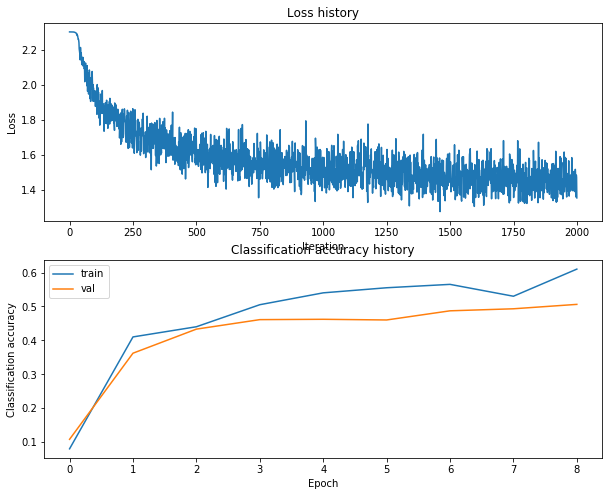

iteration 0 / 2000: loss 2.303141
iteration 100 / 2000: loss 1.968844
iteration 200 / 2000: loss 1.726397
iteration 300 / 2000: loss 1.618501
iteration 400 / 2000: loss 1.646326
iteration 500 / 2000: loss 1.604250
iteration 600 / 2000: loss 1.607260
iteration 700 / 2000: loss 1.471815
iteration 800 / 2000: loss 1.480122
iteration 900 / 2000: loss 1.587263
iteration 1000 / 2000: loss 1.495907
iteration 1100 / 2000: loss 1.518088
iteration 1200 / 2000: loss 1.472408
iteration 1300 / 2000: loss 1.503339
iteration 1400 / 2000: loss 1.543672
iteration 1500 / 2000: loss 1.561847
iteration 1600 / 2000: loss 1.473789
iteration 1700 / 2000: loss 1.366539
iteration 1800 / 2000: loss 1.448233
iteration 1900 / 2000: loss 1.571502
0.001 0.6 60 2000 300


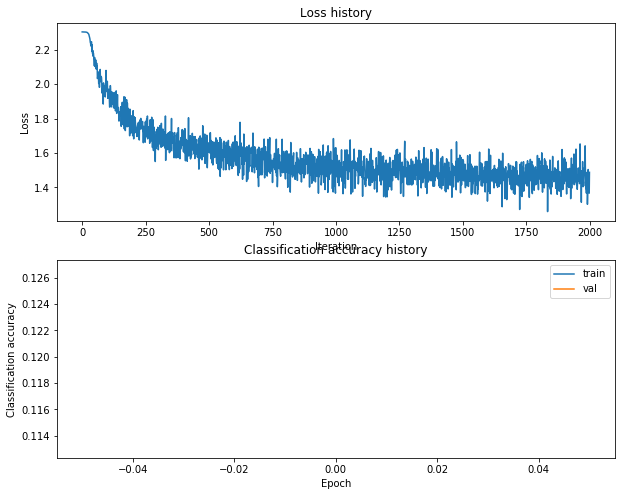

iteration 0 / 3000: loss 2.303168
iteration 100 / 3000: loss 1.862228
iteration 200 / 3000: loss 1.755239
iteration 300 / 3000: loss 1.606953
iteration 400 / 3000: loss 1.585427
iteration 500 / 3000: loss 1.633430
iteration 600 / 3000: loss 1.610447
iteration 700 / 3000: loss 1.571272
iteration 800 / 3000: loss 1.515243
iteration 900 / 3000: loss 1.549051
iteration 1000 / 3000: loss 1.517191
iteration 1100 / 3000: loss 1.566372
iteration 1200 / 3000: loss 1.591191
iteration 1300 / 3000: loss 1.473140
iteration 1400 / 3000: loss 1.456176
iteration 1500 / 3000: loss 1.687692
iteration 1600 / 3000: loss 1.516026
iteration 1700 / 3000: loss 1.484530
iteration 1800 / 3000: loss 1.546220
iteration 1900 / 3000: loss 1.406257
iteration 2000 / 3000: loss 1.394481
iteration 2100 / 3000: loss 1.425017
iteration 2200 / 3000: loss 1.360596
iteration 2300 / 3000: loss 1.383191
iteration 2400 / 3000: loss 1.470025
iteration 2500 / 3000: loss 1.372546
iteration 2600 / 3000: loss 1.630049
iteration 270

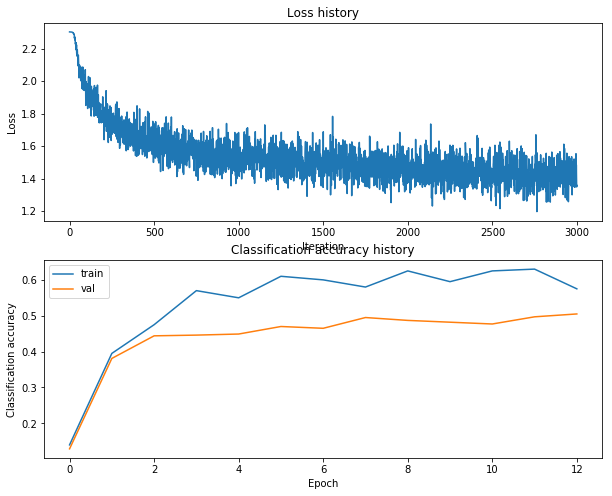

iteration 0 / 3000: loss 2.303153
iteration 100 / 3000: loss 1.883707
iteration 200 / 3000: loss 1.772887
iteration 300 / 3000: loss 1.662583
iteration 400 / 3000: loss 1.702914
iteration 500 / 3000: loss 1.607321
iteration 600 / 3000: loss 1.574756
iteration 700 / 3000: loss 1.627988
iteration 800 / 3000: loss 1.459884
iteration 900 / 3000: loss 1.531775
iteration 1000 / 3000: loss 1.537716
iteration 1100 / 3000: loss 1.511399
iteration 1200 / 3000: loss 1.532296
iteration 1300 / 3000: loss 1.534679
iteration 1400 / 3000: loss 1.441761
iteration 1500 / 3000: loss 1.469607
iteration 1600 / 3000: loss 1.494684
iteration 1700 / 3000: loss 1.439045
iteration 1800 / 3000: loss 1.488853
iteration 1900 / 3000: loss 1.394575
iteration 2000 / 3000: loss 1.535160
iteration 2100 / 3000: loss 1.411325
iteration 2200 / 3000: loss 1.371415
iteration 2300 / 3000: loss 1.484267
iteration 2400 / 3000: loss 1.461097
iteration 2500 / 3000: loss 1.433333
iteration 2600 / 3000: loss 1.455128
iteration 270

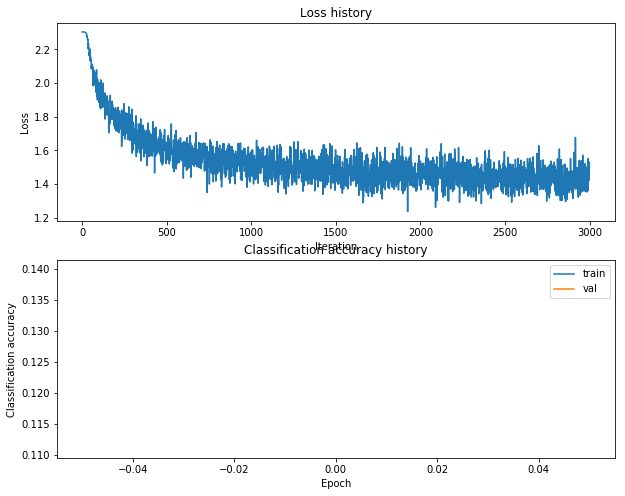

iteration 0 / 2000: loss 2.303661
iteration 100 / 2000: loss 1.939770
iteration 200 / 2000: loss 1.819294
iteration 300 / 2000: loss 1.739830
iteration 400 / 2000: loss 1.594651
iteration 500 / 2000: loss 1.623929
iteration 600 / 2000: loss 1.516038
iteration 700 / 2000: loss 1.550147
iteration 800 / 2000: loss 1.651276
iteration 900 / 2000: loss 1.616160
iteration 1000 / 2000: loss 1.488449
iteration 1100 / 2000: loss 1.514828
iteration 1200 / 2000: loss 1.457494
iteration 1300 / 2000: loss 1.475009
iteration 1400 / 2000: loss 1.412055
iteration 1500 / 2000: loss 1.503483
iteration 1600 / 2000: loss 1.406210
iteration 1700 / 2000: loss 1.339003
iteration 1800 / 2000: loss 1.335932
iteration 1900 / 2000: loss 1.473289
0.001 0.6 120 2000 200


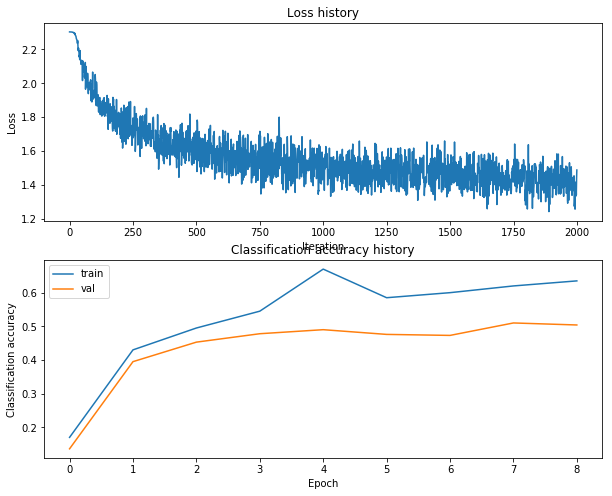

iteration 0 / 2000: loss 2.303699
iteration 100 / 2000: loss 2.006926
iteration 200 / 2000: loss 1.730751
iteration 300 / 2000: loss 1.711783
iteration 400 / 2000: loss 1.722051
iteration 500 / 2000: loss 1.588919
iteration 600 / 2000: loss 1.585061
iteration 700 / 2000: loss 1.440994
iteration 800 / 2000: loss 1.546984
iteration 900 / 2000: loss 1.530370
iteration 1000 / 2000: loss 1.453417
iteration 1100 / 2000: loss 1.415242
iteration 1200 / 2000: loss 1.454129
iteration 1300 / 2000: loss 1.511473
iteration 1400 / 2000: loss 1.412103
iteration 1500 / 2000: loss 1.514910
iteration 1600 / 2000: loss 1.402688
iteration 1700 / 2000: loss 1.373520
iteration 1800 / 2000: loss 1.397862
iteration 1900 / 2000: loss 1.412319
0.001 0.6 120 2000 300


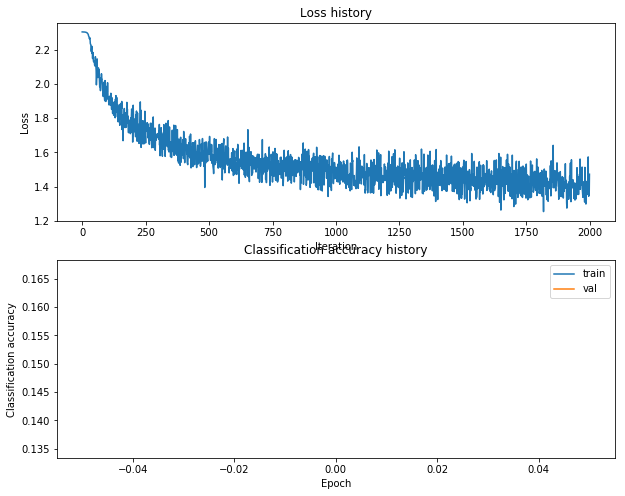

iteration 0 / 3000: loss 2.303693
iteration 100 / 3000: loss 1.896411
iteration 200 / 3000: loss 1.626750
iteration 300 / 3000: loss 1.646413
iteration 400 / 3000: loss 1.656387
iteration 500 / 3000: loss 1.632608
iteration 600 / 3000: loss 1.571013
iteration 700 / 3000: loss 1.491927
iteration 800 / 3000: loss 1.561504
iteration 900 / 3000: loss 1.538444
iteration 1000 / 3000: loss 1.485577
iteration 1100 / 3000: loss 1.444639
iteration 1200 / 3000: loss 1.528418
iteration 1300 / 3000: loss 1.567119
iteration 1400 / 3000: loss 1.460003
iteration 1500 / 3000: loss 1.375567
iteration 1600 / 3000: loss 1.411085
iteration 1700 / 3000: loss 1.357115
iteration 1800 / 3000: loss 1.540840
iteration 1900 / 3000: loss 1.450110
iteration 2000 / 3000: loss 1.429114
iteration 2100 / 3000: loss 1.368354
iteration 2200 / 3000: loss 1.410152
iteration 2300 / 3000: loss 1.462643
iteration 2400 / 3000: loss 1.439778
iteration 2500 / 3000: loss 1.345261
iteration 2600 / 3000: loss 1.358794
iteration 270

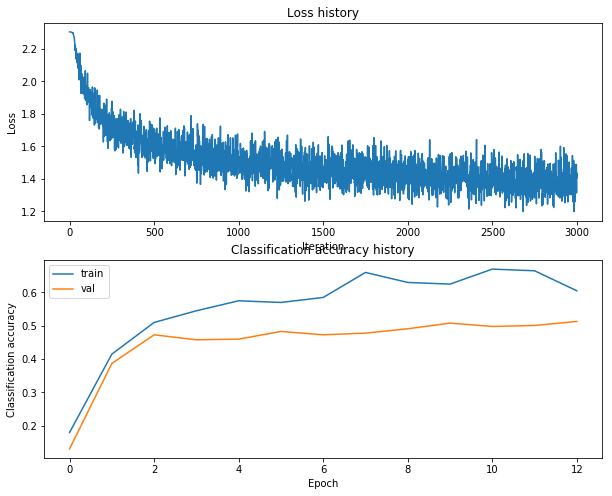

iteration 0 / 3000: loss 2.303653
iteration 100 / 3000: loss 1.973721
iteration 200 / 3000: loss 1.674045
iteration 300 / 3000: loss 1.711450
iteration 400 / 3000: loss 1.668636
iteration 500 / 3000: loss 1.626011
iteration 600 / 3000: loss 1.500994
iteration 700 / 3000: loss 1.596065
iteration 800 / 3000: loss 1.445411
iteration 900 / 3000: loss 1.539373
iteration 1000 / 3000: loss 1.475466
iteration 1100 / 3000: loss 1.427806
iteration 1200 / 3000: loss 1.486070
iteration 1300 / 3000: loss 1.425497
iteration 1400 / 3000: loss 1.497416
iteration 1500 / 3000: loss 1.437860
iteration 1600 / 3000: loss 1.476103
iteration 1700 / 3000: loss 1.457441
iteration 1800 / 3000: loss 1.490671
iteration 1900 / 3000: loss 1.466112
iteration 2000 / 3000: loss 1.456535
iteration 2100 / 3000: loss 1.367686
iteration 2200 / 3000: loss 1.425706
iteration 2300 / 3000: loss 1.384180
iteration 2400 / 3000: loss 1.479595
iteration 2500 / 3000: loss 1.427582
iteration 2600 / 3000: loss 1.445902
iteration 270

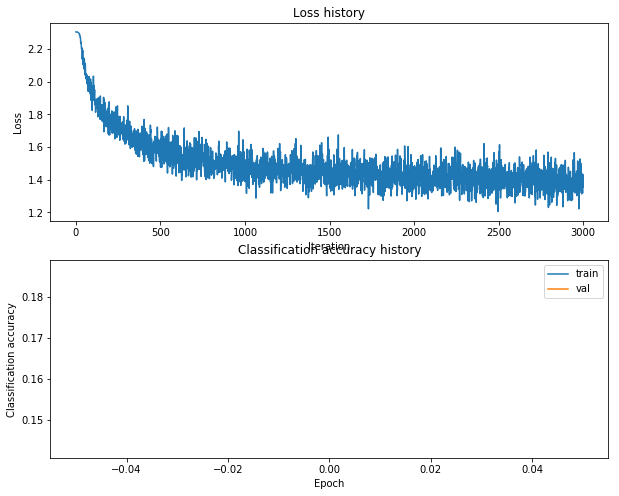

lr 1.000000e-03 reg 2.000000e-01 hs 4.000000e+01 ni 2.000000e+03 bs 2.000000e+02 train accuracy: 0.521735 val accuracy: 0.483000
lr 1.000000e-03 reg 2.000000e-01 hs 4.000000e+01 ni 2.000000e+03 bs 3.000000e+02 train accuracy: 0.526388 val accuracy: 0.481000
lr 1.000000e-03 reg 2.000000e-01 hs 4.000000e+01 ni 3.000000e+03 bs 2.000000e+02 train accuracy: 0.543776 val accuracy: 0.468000
lr 1.000000e-03 reg 2.000000e-01 hs 4.000000e+01 ni 3.000000e+03 bs 3.000000e+02 train accuracy: 0.553102 val accuracy: 0.515000
lr 1.000000e-03 reg 2.000000e-01 hs 6.000000e+01 ni 2.000000e+03 bs 2.000000e+02 train accuracy: 0.540816 val accuracy: 0.492000
lr 1.000000e-03 reg 2.000000e-01 hs 6.000000e+01 ni 2.000000e+03 bs 3.000000e+02 train accuracy: 0.551286 val accuracy: 0.517000
lr 1.000000e-03 reg 2.000000e-01 hs 6.000000e+01 ni 3.000000e+03 bs 2.000000e+02 train accuracy: 0.561980 val accuracy: 0.512000
lr 1.000000e-03 reg 2.000000e-01 hs 6.000000e+01 ni 3.000000e+03 bs 3.000000e+02 train accuracy: 

In [42]:
best_net = None # store the best model into this 
best_val = -1
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

results = {}

regularization_strengths = [0.2,0.4,0.6]
learning_rates = [1e-3]
input_size = 32 * 32 * 3
hidden_size = [40,60,120]
num_classes = 10
num_iters = [2000,3000]
batch_size = [200,300]
for lr in learning_rates:
    for reg in regularization_strengths:
        for hs in hidden_size:
            for ni in num_iters:
                for bs in batch_size:
                    net = TwoLayerNet(input_size, hs, num_classes)
                    stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=ni, batch_size=bs,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg=reg, verbose=True)
                    print(lr,reg,hs,ni,bs)
                    # Plot the loss function and train / validation accuracies
                    plt.subplot(2, 1, 1)
                    plt.plot(stats['loss_history'])
                    plt.title('Loss history')
                    plt.xlabel('Iteration')
                    plt.ylabel('Loss')

                    plt.subplot(2, 1, 2)
                    plt.plot(stats['train_acc_history'], label='train')
                    plt.plot(stats['val_acc_history'], label='val')
                    plt.title('Classification accuracy history')
                    plt.xlabel('Epoch')
                    plt.ylabel('Classification accuracy')
                    plt.legend()
                    plt.show()

                    y_train_pred = net.predict(X_train)
                    training_accuracy = np.mean(y_train == y_train_pred)
                    y_val_pred = net.predict(X_val)
                    validation_accuracy = np.mean(y_val == y_val_pred)
                    results[(lr,reg,hs,ni,bs)]=(training_accuracy,validation_accuracy)
                    if validation_accuracy > best_val:
                        best_val = validation_accuracy
                        best_net = net

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
# Print out results.
for lr, reg,hs,ni,bs in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg,hs,ni,bs)]
    print('lr %e reg %e hs %e ni %e bs %e train accuracy: %f val accuracy: %f' % (
                lr, reg,hs,ni,bs, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


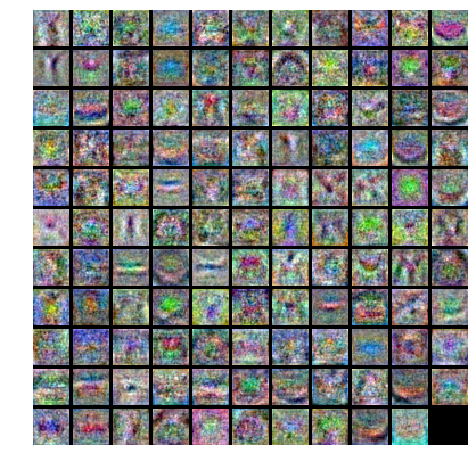

In [45]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [44]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.512


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$
1&2
$\color{blue}{\textit Your Explanation:}$



